# Zomato EDA

## 1. Importing the libraries

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ipywidgets as widgets

**User Defined Functions**

In [25]:
def value_count(s: pd.Series, print_total=False):
    name = s.name
    VC = s.value_counts().reset_index().rename(columns={
        'index' : name,
        name : 'count'})
    VC = pd.concat([
        VC,
        pd.DataFrame(
            data=[['--', s.isna().sum()]], 
            index=['NaNs'], 
            columns=[name, 'count']
        )])
     
    VC['norm'] = VC['count'] / VC['count'].sum()
    
    if print_total == True:
        VC = pd.concat([
            VC,
            pd.DataFrame( 
                index=['--', 
                       'TOTAL'
                      ], 
                columns=[name, 'count', 'norm'],
                data=[['--',              '--',              '--'],
                      ['--', VC['count'].sum(),  VC['norm'].sum()]],              
            )
        ])
    return VC

## Loading the dataset

In [20]:
df = pd.read_csv('zomato.csv',encoding='latin-1')
df_country = pd.read_excel('Country-Code.xlsx')

In [6]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [9]:
df.shape

(9551, 21)

In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [13]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [15]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

**Columns having null value**

In [16]:
[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

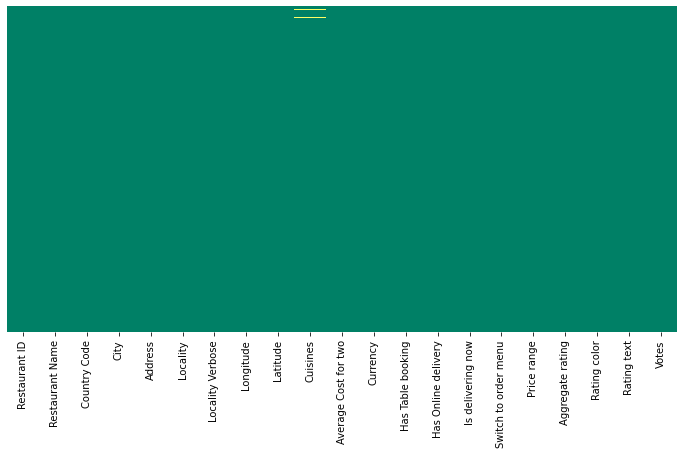

In [60]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show()

----

**Looking at the country code dataset**

In [21]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


Mergeing the dataset on Country code on left join

In [22]:
final_df = pd.merge(df,df_country,on = 'Country Code',how = 'left')

In [23]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [24]:
## Check the data types
final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [34]:
final_df.Country.value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: Country, dtype: int64

In [37]:
country_names = final_df.Country.value_counts().index
country_names

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [39]:
### Getting the values
country_value = final_df.Country.value_counts().values
country_value

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

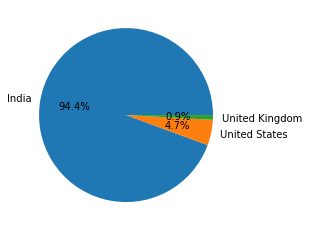

In [44]:
##### Getting a pie plot for getting
plt.pie(country_value[:3],labels = country_names[:3],autopct = '%1.1f%%')
plt.show()

**Observations** </br>
- Its a no brainer, with **94.4%** India is the biggest market for Zomato, which is evident since it is based out of India. 
- USA comes second with **4.7%** which are roughly 400+ restaurants, then comes the UK with **0.9%** having jsut 80 restaurants

In [49]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns = {0 : 'Rating Count'})

In [51]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [ ]:
### Observations

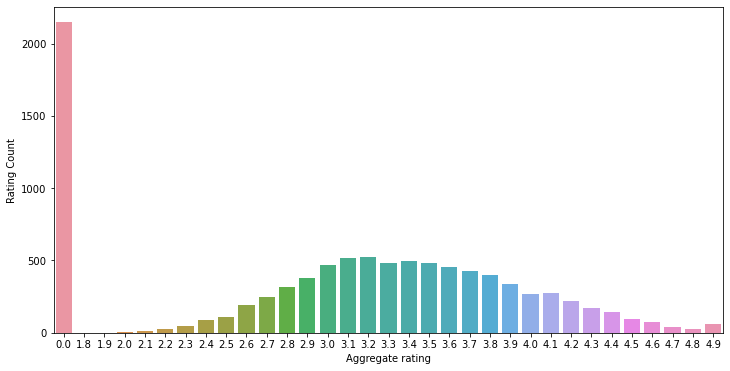

In [57]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,6)
sns.barplot(x = 'Aggregate rating',y = 'Rating Count',data = ratings)
plt.show()

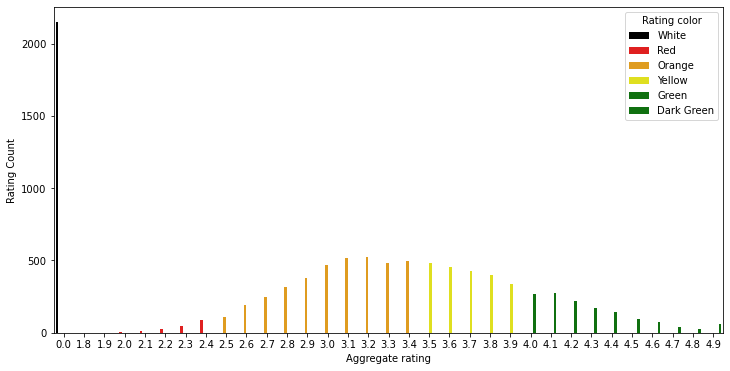

In [65]:
sns.barplot(x = 'Aggregate rating',y = 'Rating Count',
            hue = 'Rating color',data = ratings,
            palette = ['black','Red','Orange','Yellow','Green','Green']
           )
plt.show()

**Obseravtions** </br>
- most number of people have not rated the restaurants
- Max number of ratings are between 2.7 to 3.7

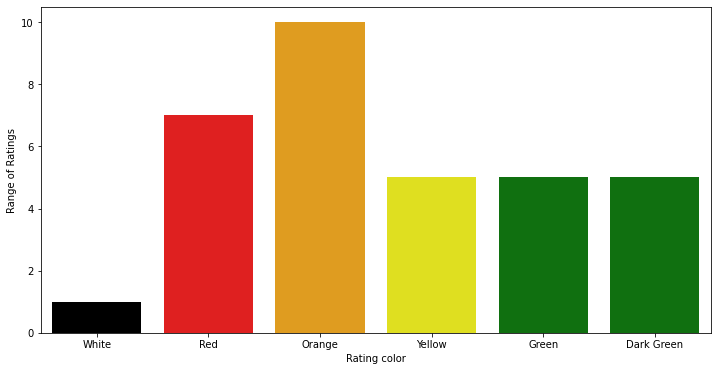

In [71]:
## Count plot for ratings
sns.countplot(x= 'Rating color',data = ratings,palette = ['black','Red','Orange','Yellow','Green','Green'],)
plt.ylabel('Range of Ratings')
plt.show()

In [73]:
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


---

**Question - Which Countries have given 0 ratings**

In [86]:
country_rating = final_df.groupby(['Aggregate rating','Country']).value_counts().reset_index()

In [96]:
country_rating[country_rating['Aggregate rating']== 0].Country.unique()

array(['Brazil', 'India', 'United Kingdom', 'United States'], dtype=object)

**Answer - Brazil, India, United Kingdom, United States**

In [102]:
final_df[final_df['Aggregate rating']== 0].groupby('Country').size().reset_index().rename(columns = {0: 'Number of Zero ratings'})

,Country,Number of Zero ratings
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


**Observations**
- Indian customers have given highest 0 ratings - 2139

In [108]:
final_df[final_df['Aggregate rating'] == 4.9].groupby('Country').size().reset_index().rename(columns = {0: 'Number of Zero ratings'})

,Country,Number of Zero ratings
0,Brazil,3
1,India,19
2,Indonesia,4
3,New Zealand,2
4,Phillipines,3
5,Qatar,1
6,South Africa,3
7,Sri Lanka,1
8,Turkey,3
9,UAE,4


In [153]:
rate = list(np.arange(0,5.1,0.1))

In [147]:
def select_rating(m=1):
    df_var = final_df[final_df['Aggregate rating'] == m].groupby('Country').size().reset_index().rename(columns = {0: f'Number of {m} ratings'})
    return df_var

In [154]:
widgets.interact(select_rating,m = rate)

interactive(children=(Dropdown(description='m', index=10, options=(0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.…

<function __main__.select_rating(m=1)>

**Question - Which Currency does each country use?**

In [155]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [186]:
final_df[['Country','Currency']].value_counts().sort_index().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


**Question - Countries having Online Delivery Options**

In [203]:
final_df[final_df['Has Online delivery'] == 'Yes'].Country.value_counts().reset_index().rename(columns={'index' : 'Country','Country':'Yes'})

,Country,Yes
0,India,2423
1,UAE,28


**Observations**
- Only two countries have Online delivery **`India`** and **`UAE`** having **`2423`** and **`28`** number of restaurants respectively

In [207]:
final_df[['Has Online delivery','Country']]\
.groupby(['Has Online delivery','Country']).value_counts()\
.reset_index()\
.rename(columns = {0 : 'No of restaurants'})

,Has Online delivery,Country,No of restaurants
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


**Question - Number of cities in each country in which Zomato operates**

In [226]:
city_country = final_df[['City','Country']].value_counts().groupby('Country').size().reset_index().rename(columns = {0:'Number of Cities'}).sort_values(by = 'Number of Cities',ascending = False)
city_country

,Country,Number of Cities
3,India,43
14,United States,35
0,Australia,23
6,Phillipines,9
9,South Africa,6
2,Canada,4
4,Indonesia,4
13,United Kingdom,4
1,Brazil,3
12,UAE,3


**Observations**
- Zomato operates in 43 cities in India, which is the highest, followed by USA with 35 and Australia with 23 number of cities

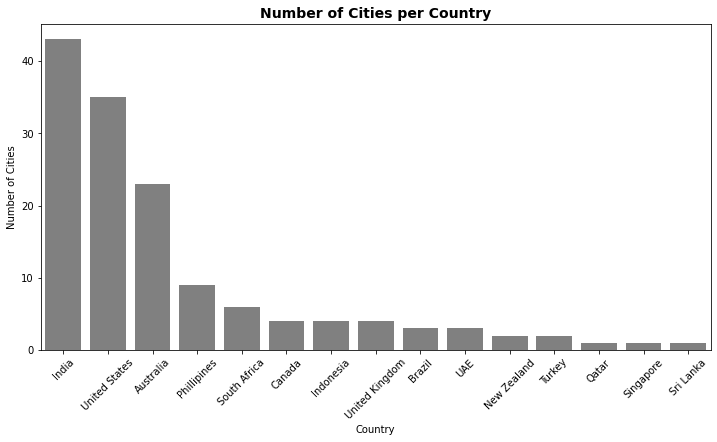

In [238]:
sns.barplot(x = 'Country',y = 'Number of Cities',data = city_country,color = 'grey')
plt.title('Number of Cities per Country',fontdict={'size': 14,'weight':'bold'})
plt.xticks(rotation = 45)
plt.show()

**Question - Top 5 Cities**

In [279]:
top_5_city = final_df.City.value_counts().reset_index().sort_values(by='City',ascending=False)[:5]
top_5_city

,index,City
0,New Delhi,5473
1,Gurgaon,1118
2,Noida,1080
3,Faridabad,251
4,Ghaziabad,25


In [281]:
city_name = final_df.City.value_counts().index

In [282]:
city_value = final_df.City.value_counts().sort_values(ascending=False).values

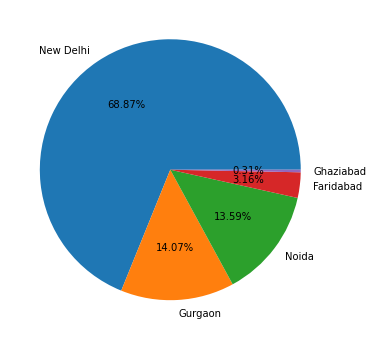

In [276]:
plt.pie(city_value[:5],labels=city_name[:5],autopct='%1.2f%%')
plt.show()

**Number of restaurants per Country**

In [284]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [285]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [328]:
def country_restaurants(Nation):
    restaurant_list = final_df[['Restaurant ID','Country']].groupby(['Country']).size().sort_values(ascending=False).reset_index().rename(columns={0: 'Number of Restaurants'})
    if Nation == 'All':
        return restaurant_list
    else:
        user_choice = restaurant_list[restaurant_list['Country'] == Nation]
        return user_choice

In [357]:
final_df[['Restaurant ID','Country']].groupby(['Country']).size().sort_values(ascending=False).reset_index()

,Country,0
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,South Africa,60
5,UAE,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


In [332]:
country_list = list(final_df[['Restaurant ID','Country']].groupby(['Country']).size().sort_values(ascending=True).reset_index().values[:,0])
country_list.append('All')
country_list.sort()

In [333]:
widgets.interact(country_restaurants,Nation = country_list)

interactive(children=(Dropdown(description='Nation', options=('All', 'Australia', 'Brazil', 'Canada', 'India',…

<function __main__.country_restaurants(Nation)>

In [375]:
restaurant_list = final_df[['Restaurant ID','Country']]\
.groupby(['Country']).size().sort_values(ascending=False)\
.reset_index()\
.rename(columns={0: 'Number of Restaurants'})

In [374]:
rest_per_city = city_country.merge(restaurant_list,on='Country',how='left')

In [371]:
rest_per_city['restaurant_per_city'] = round(rest_per_city['Number of Restaurants']/rest_per_city['Number of Cities'],2)

In [372]:
rest_per_city

,Country,Number of Cities,Number of Restaurants,restaurant_per_city
0,India,43,8652,201.21
1,United States,35,434,12.40
2,Australia,23,24,1.04
3,Phillipines,9,22,2.44
4,South Africa,6,60,10.00
5,Canada,4,4,1.00
6,Indonesia,4,21,5.25
7,United Kingdom,4,80,20.00
8,Brazil,3,60,20.00
9,UAE,3,60,20.00


**Observations**
- Zomato has `8652` restaurants listed in `India` across `43` Cities having 201 restaurants per city
- United States sits second as per total number of restaurants(434) but has only 12 restaurants per city
- On the other hand, we see countries like UK,Brazil,Sri Lanka,Qatar,New Zealand, Singapore they have restaurant per city as `20`

___